# Module: basic Python
### Assignment #4 (October 7, 2021)
 

## Goal
Create a ProbabilityDensityFunction class that is capable of throwing
preudo-random number with an arbitrary distribution.

(In practice, start with something easy, like a triangular distribution---the
initial debug will be easier if you know exactly what to expect.)


## Specifications
- the signature of the constructor should be __init__(self, x, y), where
  x and y are two numpy arrays sampling the pdf on a grid of values, that
  you will use to build a spline
- [optional] add more arguments to the constructor to control the creation
  of the spline (e.g., its order)
- the class should be able to evaluate itself on a generic point or array of
  points
- the class should be able to calculate the probability for the random
  variable to be included in a generic interval
- the class should be able to throw random numbers according to the distribution
  that it represents
- [optional] how many random numbers do you have to throw to hit the
  numerical inaccuracy of your generator?

In [48]:
from scipy.interpolate import InterpolatedUnivariateSpline
from random import random
import numpy as np

class ProbabilityDensityFunction(InterpolatedUnivariateSpline):
    """This ProbabilityDensityFunction derived class from 
    InterpolatedUnivariateSpline(x, y, w=None, bbox=[None, None], k=3, ext=0, check_finite=False)
    class describes a probability density function.
    """
    def __init__(self, x, y, a = 3):
        """This is the constructor of the class, x and y are two numpy arrays sampling 
        the pdf on a grid of values and a is the degree of the polinomial"""
        f = InterpolatedUnivariateSpline(x, y, k = a)
        self._F = f.antiderivative() # Mi tengo da parte la cumulata
        self._xmin = np.min(x)
        self._xmax = np.max(x)
        self._F_max = self._F(self._xmax)
        InterpolatedUnivariateSpline.__init__(self, self._F(x)/self._F_max, x, k = a)
        
    def probIn(self, min, max):
        if min < self._xmin or max > self._xmax:
            raise Exception(f"Bounds are out of range [{self._xmin}, {self._xmax}]")
        return (self._F(max) - self._F(min))/self._F_max
    
    def random(self, size = 1000):
        """Return an array of random values from the pdf.
        """
        q = np.random.uniform(low=0., high=1., size=(size,))
        return self(q)
    

the probability is: 0.25000000000000006


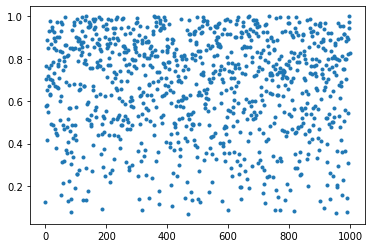

In [49]:
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 1000
x = np.linspace(0., 1., 30)
y = np.linspace(0., 3., 30)
#Gaussian
#x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
#y = norm.pdf(x)
g = ProbabilityDensityFunction(x, y)
print(f"the probability is: {g. probIn(0,0.5)}")

plt.plot(range(N), g.random(N), '.')

#plt.plot(x, y, 'o')
#plt.plot(x, f(x))
plt.show()


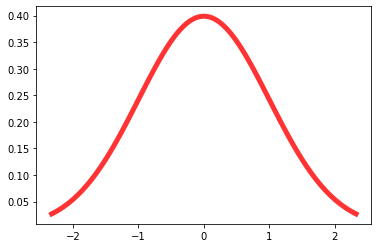

In [13]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.8, label='norm pdf')

In [96]:
#First I define the vectors fot the distribution
x = np.linspace(0., 1., 30)
y = np.linspace(0., 3., 30)
xmin = np.min(x)
xmax = np.max(x)

#Then I calculate the integral to see if it's normalized
I = integral(min(x), max(x))

#Then I divide y vector for it
y1 = y/I

#Calculate the first spline to integrate
F1 = InterpolatedUnivariateSpline(x, y1, k = 3)

#Now I can proceed by calculating the F
F =  np.array([F1.integral(xmin, xmax)])

#Then I have to spline the F with x and F inverted 
f = InterpolatedUnivariateSpline(y, F, k = 3)

NameError: name 'integral' is not defined

0.0 1.3333333333333328
1.3333333333333328
-1.0000000000000004 1.0


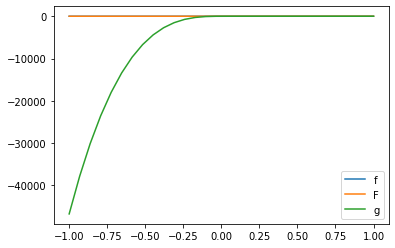

In [150]:
x = np.linspace(-1., 1., 30)
y = 1- x**2
#y = np.linspace(0., 3., 30)
#plt.plot(x, y, 'o', label = 'points')

f = InterpolatedUnivariateSpline(x, y, k = 3)
plt.plot(x, f(x), label = 'f')

F = f.antiderivative()
plt.plot(x, F(x), label = 'F')


xmin = np.min(x)
xmax = np.max(x)
F_max = F(xmax)
g = InterpolatedUnivariateSpline(F(x)/F_max, x, k = 3)

plt.plot(x, g(x), label = 'g')

print(F(xmin), F(xmax))
print(F_max)
print(g(0), g(1))


#plt.plot(x, y/F_max, '+')
plt.legend()
plt.show()

min([1,2,3])

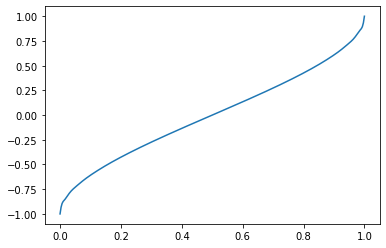

In [151]:
z = np.linspace(0., 1., 300)
plt.plot(z, g(z))

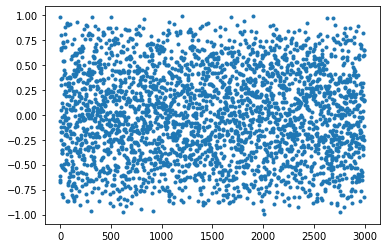

In [152]:
N = 3000
q = np.random.uniform(low=0., high=1., size=(N,))
g(q)
plt.plot(range(N), g(q), '.')